# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy==0.0.5

     |████████████████████████████████| 563kB 1.5MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559703 sha256=4efa5d3cb28aefa9f3506ef9f23cb2427233b9da1a7c53ee7559a39f8038915d
  Stored in directory: /Users/paulaurteaga/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
import datetime

from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
counter=1
set_num=1
new_cities=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="
print('Beginning data retrieval')
print('-----------------------------')
for city in cities:
    response = requests.get(f'{query_url}{city}&units=metric').json()
    if counter<=50:
        try:
            print(f"Processing record {counter} of set {set_num} |{response['name']}")
            new_cities.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            counter=counter+1
        except (KeyError, IndexError):
            print("City not found. Skipping...")
            
    else:
        counter=1
        set_num=set_num+1
print('-----------------------------')
print('Data Retreival completed')
print('-----------------------------')

Beginning data retrieval
-----------------------------
Processing record 1 of set 1 |Airai
Processing record 2 of set 1 |Provideniya
Processing record 3 of set 1 |Port Alfred
Processing record 4 of set 1 |Mar del Plata
City not found. Skipping...
Processing record 5 of set 1 |Guerrero Negro
Processing record 6 of set 1 |Busselton
Processing record 7 of set 1 |Manali
Processing record 8 of set 1 |Sur
Processing record 9 of set 1 |Yellowknife
Processing record 10 of set 1 |Hong Kong
Processing record 11 of set 1 |Lebu
Processing record 12 of set 1 |Jamestown
Processing record 13 of set 1 |Ponta do Sol
Processing record 14 of set 1 |Bredasdorp
Processing record 15 of set 1 |Srandakan
Processing record 16 of set 1 |Ostrovnoy
Processing record 17 of set 1 |Saint-Philippe
City not found. Skipping...
Processing record 18 of set 1 |Merke
Processing record 19 of set 1 |East London
Processing record 20 of set 1 |Dalby
City not found. Skipping...
Processing record 21 of set 1 |Avarua
Processing r

Processing record 43 of set 4 |Waipawa
Processing record 44 of set 4 |Bulolo
Processing record 45 of set 4 |Hasaki
Processing record 46 of set 4 |Tura
Processing record 47 of set 4 |Marsh Harbour
Processing record 48 of set 4 |Grand-Santi
Processing record 49 of set 4 |Diego de Almagro
Processing record 50 of set 4 |Toora-Khem
Processing record 1 of set 5 |Skofja Loka
Processing record 2 of set 5 |Touros
Processing record 3 of set 5 |Ouango
City not found. Skipping...
Processing record 4 of set 5 |Kodiak
Processing record 5 of set 5 |Olafsvik
Processing record 6 of set 5 |Khatanga
Processing record 7 of set 5 |Lagoa
Processing record 8 of set 5 |Kungurtug
Processing record 9 of set 5 |Karabulak
Processing record 10 of set 5 |Astaneh-ye Ashrafiyeh
City not found. Skipping...
Processing record 11 of set 5 |Santa Fe
Processing record 12 of set 5 |Half Moon Bay
Processing record 13 of set 5 |Vanavara
Processing record 14 of set 5 |Iralaya
Processing record 15 of set 5 |Khovd
Processing rec

Processing record 33 of set 8 |Qatana
City not found. Skipping...
Processing record 34 of set 8 |Portland
Processing record 35 of set 8 |Gazli
Processing record 36 of set 8 |Pop
Processing record 37 of set 8 |Port-Cartier
Processing record 38 of set 8 |Honghu
Processing record 39 of set 8 |West Wendover
Processing record 40 of set 8 |Khatassy
Processing record 41 of set 8 |Awjilah
Processing record 42 of set 8 |Morgan City
Processing record 43 of set 8 |Pokrovka
Processing record 44 of set 8 |Darnah
Processing record 45 of set 8 |Oranjestad
Processing record 46 of set 8 |Padang
Processing record 47 of set 8 |Kiryat Gat
Processing record 48 of set 8 |Srivardhan
Processing record 49 of set 8 |Codrington
Processing record 50 of set 8 |Pangai
Processing record 1 of set 9 |Nago
Processing record 2 of set 9 |Saint Anthony
Processing record 3 of set 9 |Kieta
Processing record 4 of set 9 |Beasain
Processing record 5 of set 9 |Kathu
Processing record 6 of set 9 |Yerbogachen
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
dic={'City':new_cities,'Cloudiness':cloudiness,'Country':country,'Date':date,'Humidity':humidity, 'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind speed':wind_speed}
weather_data=pd.DataFrame(dic)
weather_data.to_csv('../weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,Airai,100,TL,1579986269,93,-8.93,125.41,20.15,0.54
1,Provideniya,0,RU,1579986269,73,64.38,-173.30,-21.91,2.23
2,Port Alfred,0,ZA,1579986269,97,-33.59,26.89,18.89,0.89
3,Mar del Plata,0,AR,1579986223,63,-38.00,-57.56,21.58,6.61
4,Guerrero Negro,0,MX,1579986269,43,27.98,-114.06,21.81,1.95


In [7]:
#Going to convert the 10 digit date format to a readable format
weather_data['Date']=pd.to_datetime(weather_data['Date'])
weather_data['Date']=weather_data['Date'].map(lambda x: x.strftime('%Y/%m/%d'))
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,Airai,100,TL,1970/01/01,93,-8.93,125.41,20.15,0.54
1,Provideniya,0,RU,1970/01/01,73,64.38,-173.30,-21.91,2.23
2,Port Alfred,0,ZA,1970/01/01,97,-33.59,26.89,18.89,0.89
3,Mar del Plata,0,AR,1970/01/01,63,-38.00,-57.56,21.58,6.61
4,Guerrero Negro,0,MX,1970/01/01,43,27.98,-114.06,21.81,1.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

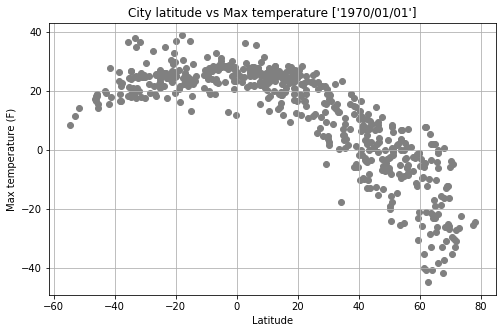

As we can see in this Latitude vs Max temperature analysis on ['1970/01/01'] we conlude that the farder we go from the Equator, latitude 0, temperatures will likely start to drop, no mather if we go up or down, and they will drop way faster as we go up the equator


In [8]:
date=weather_data["Date"].unique()
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Max Temp'],color='grey')
plt.title(f'City latitude vs Max temperature {date}')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig('../images/latvsmaxtemp.png')
plt.show()
print(f'As we can see in this Latitude vs Max temperature analysis on {date} we conlude that the farder we go from the Equator, latitude 0, temperatures will likely start to drop, no mather if we go up or down, and they will drop way faster as we go up the equator')

#### Latitude vs. Humidity Plot

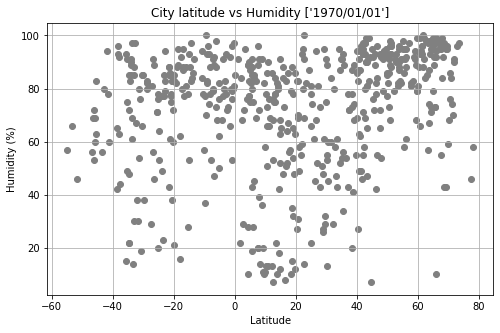

In tnis scatter plot we see there is not a strong correlation between latitude and humidity, since data points seem to be really dispersed. Humidity remains between 60-100% most of the time, no matter which latitude point we are on


In [9]:
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Humidity'],color='grey')
plt.title(f'City latitude vs Humidity {date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('../images/latvshum.png')
plt.show()
print(f'In tnis scatter plot we see there is not a strong correlation between latitude and humidity, since data points seem to be really dispersed. Humidity remains between 60-100% most of the time, no matter which latitude point we are on')

#### Latitude vs. Cloudiness Plot

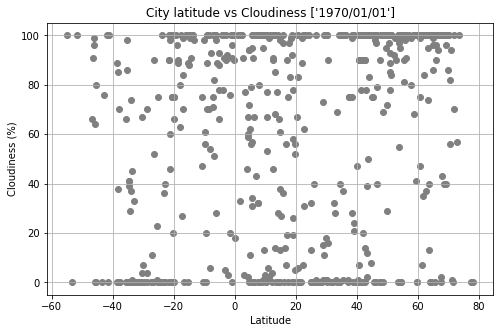

Same as the last plot, humidity data points dont seem concentrated enough on any specific latitude point to aprove a correlation. We do appreciate a simple fact, whenever cloudiness has reached its limits on one side of the equator, either 0 or 100%, it will likely reach the same limits on the exact opposite side of the equator


In [10]:
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'],color='grey')
plt.title(f'City latitude vs Cloudiness {date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('../images/latvscloud.png')
plt.show()
print(f'Same as the last plot, humidity data points dont seem concentrated enough on any specific latitude point to aprove a correlation. We do appreciate a simple fact, whenever cloudiness has reached its limits on one side of the equator, either 0 or 100%, it will likely reach the same limits on the exact opposite side of the equator')

#### Latitude vs. Wind Speed Plot

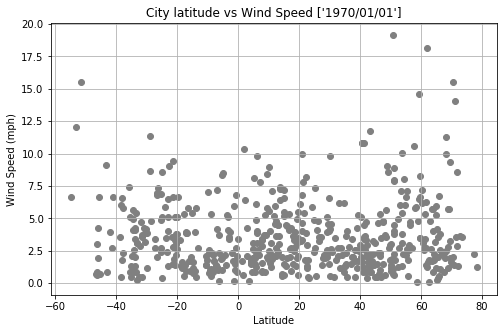

According to this plot, we can say that at some extreme latitude points, such as lower than -60 and higher than 60, winds speed will probably be higher than normal, but other than that latitude doesnt really affect wind speed


In [11]:
plt.figure(figsize=(8,5))
plt.scatter(weather_data['Lat'],weather_data['Wind speed'],color='grey')
plt.title(f'City latitude vs Wind Speed {date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('../images/latvswind.png')
plt.show()
print(f'According to this plot, we can say that at some extreme latitude points, such as lower than -60 and higher than 60, winds speed will probably be higher than normal, but other than that latitude doesnt really affect wind speed' )

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_dataframe=weather_data.loc[weather_data['Lat']>=0]
southern_dataframe=weather_data.loc[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8718489778830686


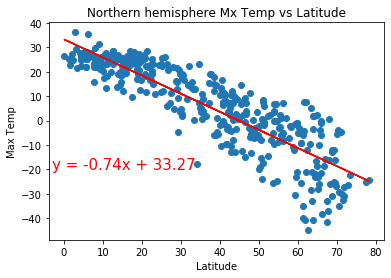

In [13]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,-20))
plt.title('Northern hemisphere Mx Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvsmaxtemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4042515146195119


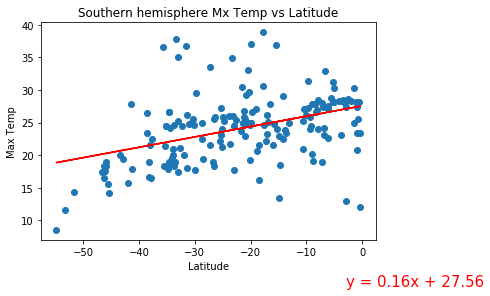

In [14]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,10),fontsize=15,color="red", xytext=(-3,0))
#for some reason the equation is not showing, even tho its at the same position as the upper one
plt.title('Southern hemisphere Mx Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvsmaxtemp.png')
plt.show()

In [15]:
#In both hemospheres, we can see that the farder we get from the equator the temperatures will drop right away. 
#However, if we send someone 50 points north the equator and another one 50 points south, the second one, according
#to our linear regression equation will be experimenting a 20 degree avg temperature while our guy in the north will
#be probably freezing at 0 degrees more or less. So as the r-quare value of -0.8 shows in the first picture, the strong
#negative correlation between max temp and latitude tells us the higher one of the variables gets the lower the other
#one will get and viceversa.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.407444697211646


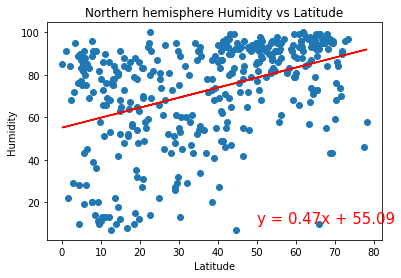

In [16]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(50,10))
plt.title('Northern hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvshum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25725230990784786


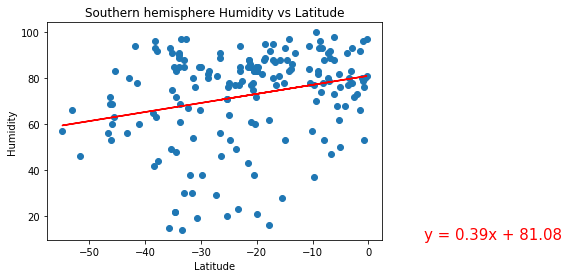

In [18]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,10),fontsize=15,color="red", xytext=(10,10))
#for some reason the equation is not showing, even tho its at the same position as the upper one
plt.title('Southern hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvshum.png')
plt.show()

In [19]:
#After seeing each plot and their respective r-square values, 0.31 and 0.46, we can see that theres a 
#positive correlation no matter which hemisphere, but neither of them are strong enough to build a predictive model.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23834453559108892


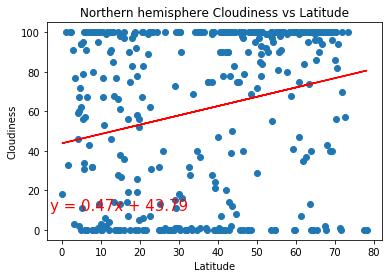

In [20]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(-3,10))
plt.title('Northern hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvscloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3457360628663181


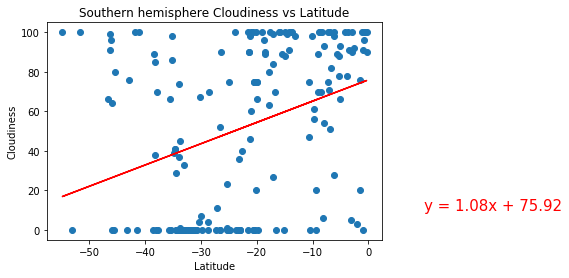

In [23]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red", xytext=(10,10))
#for some reason the equation is not showing, even tho its at the same position as the upper one
plt.title('Southern hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvscloud.png')
plt.show()

In [24]:
#In both hemispheres the positive r-quare is really similar, 0.23 and 0.25, which doesnt really represent a strong correlation.
#Even though, if we put our guy 50 points north the equator humidity will likely be close to 60%, and our guy 50 
#points south the equator will be experimenting a 20% humidity level, so the humidity drops faster in the southern
#hemisphere than the northern as we keep walking away the lat 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07380122713856352


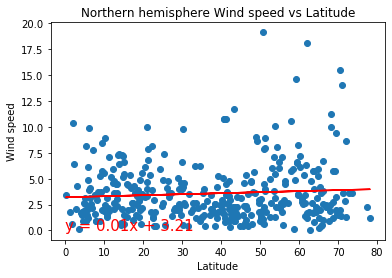

In [27]:
x_values = northern_dataframe['Lat']
y_values = northern_dataframe['Wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", xytext=(0,0))
plt.title('Northern hemisphere Wind speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/northlatvswind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.22020839758157543


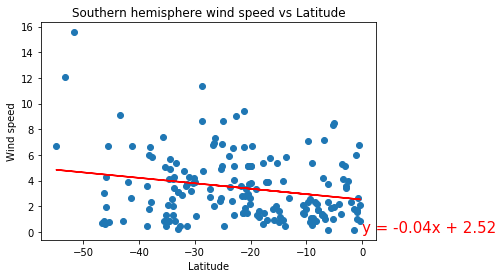

In [31]:
x_values = southern_dataframe['Lat']
y_values = southern_dataframe['Wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,10),fontsize=15,color="red", xytext=(0,0))
#for some reason the equation is not showing, even tho its at the same position as the upper one
plt.title('Southern hemisphere wind speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('../images/southlatvswind.png')
plt.show()

In [ ]:
#Here we can see that in the northern hemisphere theres a positive correlation, not that strong thought (0.21) and
#a negative similar correlation in the southern hemisphere (-0.37). Again, if we get our same two guys at the exact
#opposite places north and south the equator, the one in the south will be experimenting wind speed change much earlier.